# FRET biosensor for measurements of CDK1 activity in colon cancer cells

### Motivation

This project was focused on chromosome instability (W-CIN) as a hallmark of human cancer. W-CIN can be induced by abnormally increased microtubule plus end assembly rates during mitosis leading to the generation of lagging chromosomes during anaphase as a major form of mitotic errors in human cancer cells. We wanted to confirm that loss of the tumor suppressor genes TP53 and TP73 (Colon cancer cells_mutated and Colon cancer cells_mutated_inhibitor, respectively) could trigger increased CDK1 activity. CDKN1A, encoding for the CDK inhibitor p21CIP1, represents a critical target gene of p53/p73. Loss of p21CIP1 could unleash CDK1 activity which causes W-CIN in otherwise chromosomally stable cancer cells (Lung cancer cells_mutated). Thus, we wanted to confirm with FLIM technique that the p53/p73 - p21CIP1 tumor suppressor axis, whose loss is associated with W-CIN in human cancer, safeguards against chromosome missegregation and aneuploidy by preventing abnormally increased CDK1 activity.

Fluorescence- or Förster resonance energy transfer (FRET) is a measurable physical energy transfer phenomenon between appropriate chromophores, when they are in sufficient proximity, usually within 10 nm. This feature has made them very useful tools for many biomedical studies on molecular interactions.

<img src="sensors.png"  alt="Drawing" style="width: 550px"/>

**Effects of FRET on fluorescence properties** (A) FRET produces a change in the emissions intensities of the donor $(Em_{D})$ and the acceptor $(Em_{A})$, clearly measurable as a change in ratio;  
(B) FRET has a characteristic effect on the fluorescent lifetime $\tau$: when FRET is present the lifetime is shorter ($\tau_{FRET}$) than without FRET ( $\tau_{noFRET}$).

# Abstract in points

* As  a specific activity sensor of CyclinB1-Cdk1 complex Förster  resonance  energy  transfer  (FRET) biosensor was employed

* mCerulean (CFP variant) and YPet (YFP variant) fluorescent proteins were used as the FRET pair

* FRET efficiency of activity biosensor was investigated with fluorescence lifetime imaging (FLIM)

* Fluorescence lifetime decay of CFP (donor) was measured in wild type (WT), mutated and mutated cells treated with inhibitor of biosensor (negative control) 

* Analysis of the data should reveal whether FRET efficiency is greater in mutated cells therefore CDK1 activity is elevated

* Several approaches of analysis of this particular data set is shown

* Main aim of this notebook is to discuss the right approach for evaluating data measured on colon and lung cancer cell lines 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import csv

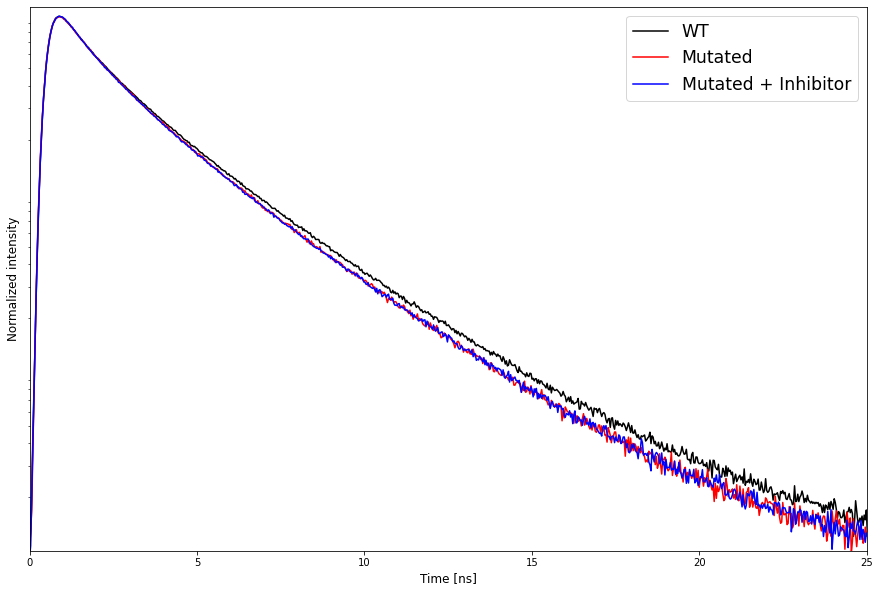

In [2]:
th=np.loadtxt('data/CCC_Decays.txt')
t_data = th.T[0]
WT_decay = th.T[1]
Mut_decay = th.T[2]
MutI_decay = th.T[3]

plt.figure(figsize=(15,10))
WT = plt.semilogy(t_data,WT_decay,'k-',label = 'WT' )
Mut = plt.semilogy(t_data,Mut_decay,'r-',label = 'Mutated')
MutI = plt.semilogy(t_data,MutI_decay,'b-',label ='Mutated + Inhibitor')
plt.xlim([0,25])
plt.ylim([0.001,1.1])

plt.legend(fontsize = 'xx-large',loc='upper right')
plt.xlabel('Time [ns]',fontsize = 'large')
plt.ylabel('Normalized intensity',fontsize = 'large')

ax = plt.gca()
ax.axes.yaxis.set_ticks([])

plt.show()

Averaged fluorescence lifetime decays clearly shows difference between **wild type** (WT) and **mutated** but no change for **mutated** cells treated with **biosensor inhibitor**

# Exponential model for fitting - **1**, **2** or **3** exponentials?

* It has been shown that CFP fluorescence lifetime displays two components  

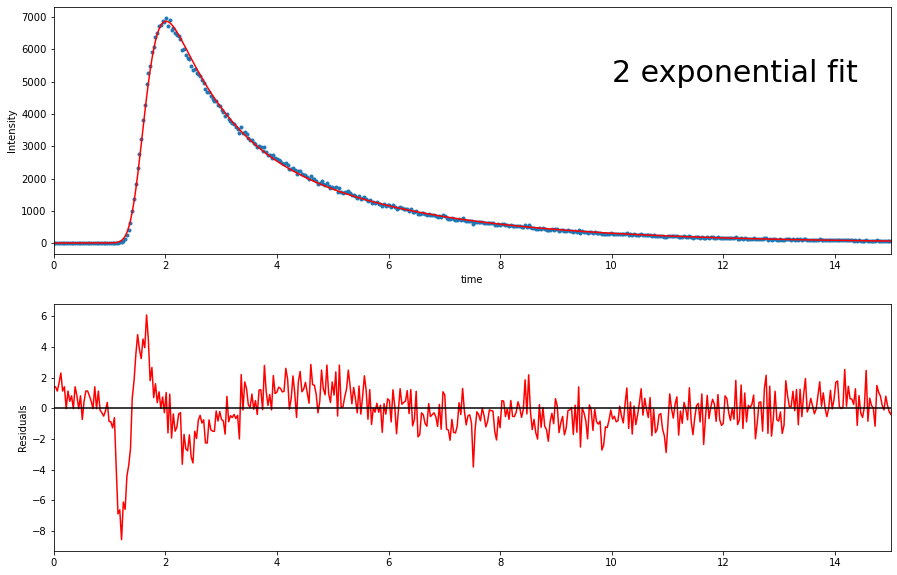

In [3]:
# data of selected cell with 2 exponetial fit

th=np.loadtxt('data/A17_2exp_fit_data.txt')
t_data2 = th.T[0]
x_data = th.T[2]
IRF = th.T[1]
Fit = th.T[3]
Res2 = th.T[4]
x_res = np.arange(0.0,20,0.1)
y_res = np.zeros(x_res.size)

plt.figure(figsize=(15,10))
plt.subplot(211)
plt.plot(t_data2,x_data,'.',t_data2,Fit,'r-')
plt.xlabel('time')
plt.ylabel('Intensity')
plt.xlim([0, 15])
#plt.annotate('2 exponential fit',xy=(1,5), xytext=(10, 5000))
plt.text(10, 5000, '2 exponential fit', size=30)
plt.subplot(212)
plt.plot(t_data2,Res2,'r-',x_res,y_res,'k-')
plt.ylabel('Residuals')
plt.xlim([0, 15])
plt.show()

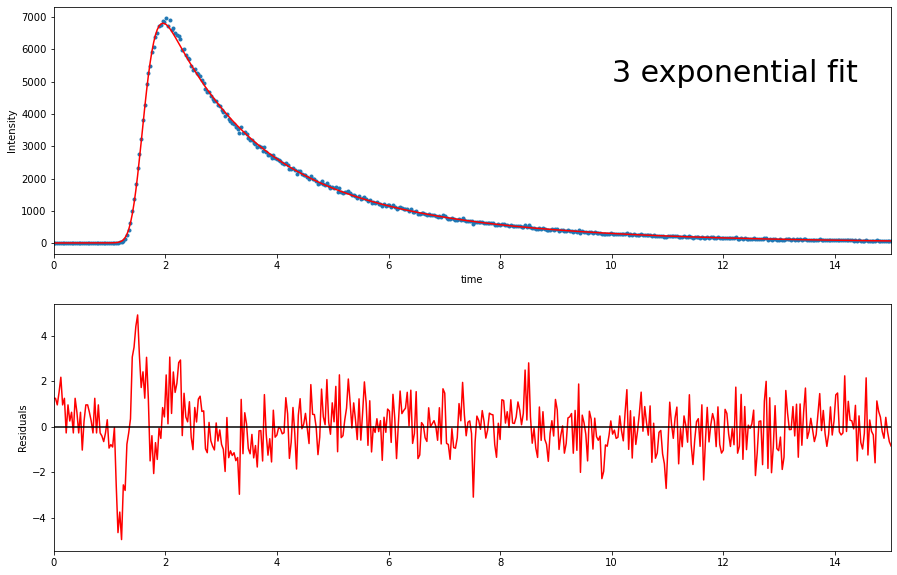

In [5]:
# data of selected cell with 3 exponetial fit

th=np.loadtxt('data/A17_3exp_fit_data.txt')
t_data3 = th.T[0]
x_data = th.T[2]
IRF = th.T[1]
Fit = th.T[3]
Res3 = th.T[4]
x_res = np.arange(0.0,20,0.1)
y_res = np.zeros(x_res.size)

plt.figure(figsize=(15,10))
plt.subplot(211)
plt.plot(t_data3,x_data,'.',t_data3,Fit,'r-')
plt.xlabel('time')
plt.ylabel('Intensity')
plt.xlim([0, 15])
plt.text(10, 5000, '3 exponential fit', size=30)

plt.subplot(212)
plt.plot(t_data3,Res3,'r-',x_res,y_res,'k-')
plt.ylabel('Residuals')
plt.xlim([0, 15])
plt.show()

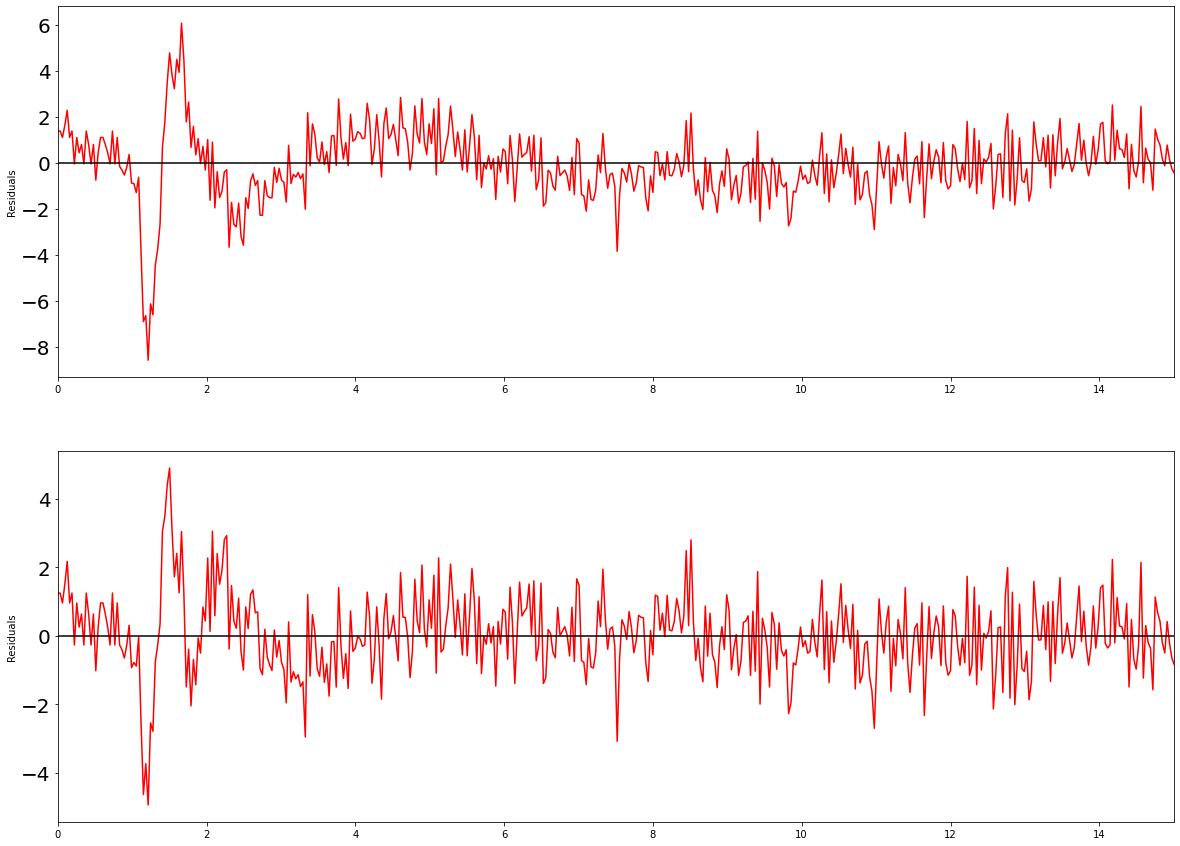

In [6]:
# Residuals

plt.figure(figsize=(20,15))
plt.subplot(211)
plt.plot(t_data2,Res2,'r-',x_res,y_res,'k-')
plt.ylabel('Residuals')
plt.xlim([0, 15])

plt.yticks(fontsize = 20)

plt.subplot(212)
plt.plot(t_data3,Res3,'r-',x_res,y_res,'k-')
plt.ylabel('Residuals')
plt.xlim([0, 15])

plt.yticks(fontsize = 20)

plt.show()

# Exponential fit analysis

* Reconvolution fitting with exponential model

$$ I(t) = \displaystyle\sum_{i} A_{i} e^{{-t}/{\tau_{i}}}\oplus \mathrm{IRF}  $$

where IRF stands for Instrument Response Function

* There are at least two possibilities how to calculate average lifetime:

**Amplitude average** $(\tau_{Amp})$ 


$$ \tau_{Amp} = \frac{\displaystyle\sum_{k=1}^{n} A(k)\tau(k)}{\displaystyle\sum_{k=1}^{n} A(k)} $$

**Intensity average** $(\tau_{Int})$ 

$$ \tau_{Int} = \frac{\displaystyle\sum_{k=1}^{n} A(k)\tau(k)^2}{\displaystyle\sum_{k=1}^{n} A(k)\tau(k)} $$

### Loading fitted data for further analysis - colon cancer cells

In [7]:
# loading parameters from csv files for colon cancer cells

with open('data/Colon cancer cells_mutated_FitExp2.csv') as csvfile:
    #ccc_mut_2 = csv.reader(csvfile)
    data = list(csv.reader(csvfile))

    data = np.array(data)
    ccc_mut_2 = np.array(data[1:,1:], dtype = float)
    
with open('data/Colon cancer cells_mutated_FitExp3.csv') as csvfile:
    #ccc_mut_3 = csv.reader(csvfile)
    data = list(csv.reader(csvfile))
    data = np.array(data)
    ccc_mut_3 = np.array(data[1:-1,1:], dtype = float)

with open('data/Colon cancer cells_mutated_inhibitor_FitExp2.csv') as csvfile:
    #ccc_mut_I2 = csv.reader(csvfile)
    data = list(csv.reader(csvfile))
    data = np.array(data)
    ccc_mut_I2 = np.array(data[1:,1:], dtype = float)

with open('data/Colon cancer cells_mutated_inhibitor_FitExp3.csv') as csvfile:
    #ccc_mut_I3 = csv.reader(csvfile)
    data = list(csv.reader(csvfile))
    data = np.array(data)
    ccc_mut_I3 = np.array(data[1:,1:], dtype = float)    

with open('data/Colon cancer cells_WT_FitExp2.csv') as csvfile:
    #ccc_WT_2 = csv.reader(csvfile)
    data = list(csv.reader(csvfile))
    data = np.array(data)
    ccc_WT_2 = np.array(data[1:,1:], dtype = float)

with open('data/Colon cancer cells_WT_FitExp3.csv') as csvfile:
    #ccc_WT_3 = csv.reader(csvfile)
    data = list(csv.reader(csvfile))
    data = np.array(data)
    ccc_WT_3 = np.array(data[1:-1,1:], dtype = float)

### Following code can be used without change also for analysis of lung cancer cells - just open the proper data files.

# 2 exponential fit analysis

* Compare **Amplitude average** and **Intensity average** lifetimes

In [8]:
# Averaged Lifetimes - 2 exp

WT_Int2 = ccc_WT_2[:,8]
WT_Amp2 = ccc_WT_2[:,9]
Mut_Int2 = ccc_mut_2[:,8]
Mut_Amp2 = ccc_mut_2[:,9]
Mut_inh_Int2 = ccc_mut_I2[:,8]
Mut_inh_Amp2 = ccc_mut_I2[:,9]

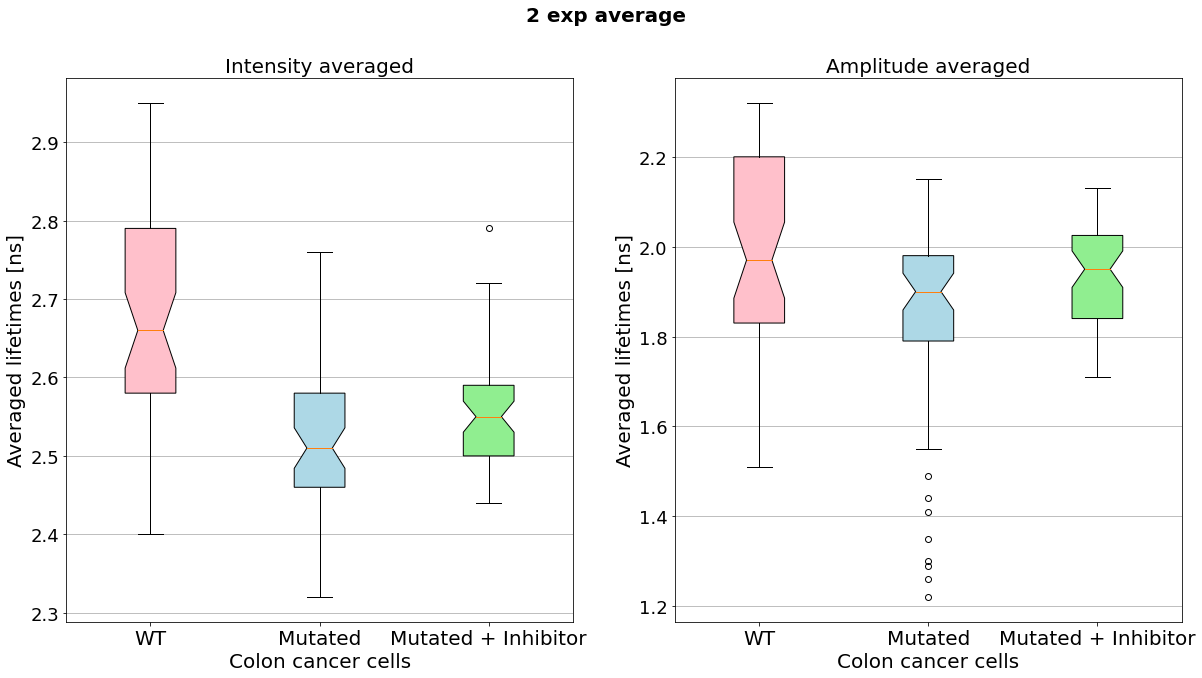

In [9]:
# boxplots for 2 exp averaged lifetimes

font_head = 20
font_lab = 18

Int_data =((WT_Int2, Mut_Int2, Mut_inh_Int2))
Amp_data =((WT_Amp2, Mut_Amp2, Mut_inh_Amp2))
labels = ['WT', 'Mutated', 'Mutated + Inhibitor']

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

fig.suptitle('2 exp average', fontsize=font_head, fontweight='bold')

# Intensity averaged boxplot
bplot1 = ax1.boxplot(Int_data,
                     notch=True,        # notch shape
                     vert=True,         # vertical box alignment
                     patch_artist=True, # fill with color
                    labels=labels)      # will be used to label x-ticks
ax1.set_title('Intensity averaged',fontsize=font_head)


# Amplitude intensity boxplot
bplot2 = ax2.boxplot(Amp_data,
                     notch=True,  # notch shape
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=labels)      # will be used to label x-ticks   
                     
ax2.set_title('Amplitude averaged',fontsize=font_head)

# fill with colors
colors = ['pink', 'lightblue', 'lightgreen']
for bplot in (bplot1,bplot2):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

# adding horizontal grid lines
for ax in [ax1, ax2]:
    ax.yaxis.grid(True)
    ax.set_xlabel('Colon cancer cells',fontsize=20)
    ax.set_ylabel('Averaged lifetimes [ns]',fontsize=20)
    
    plt.setp(ax.get_xticklabels(),fontsize = font_head)
    plt.setp(ax.get_yticklabels(),fontsize = font_lab)

# 3 exponential fit analysis

* Compare **Amplitude average** and **Intensity average** lifetimes


In [10]:
# Averaged Lifetimes - 3 exp

WT_Int3 = ccc_WT_3[:,10]
WT_Amp3= ccc_WT_3[:,11]
Mut_Int3 = ccc_mut_3[:,10]
Mut_Amp3 = ccc_mut_3[:,11]
Mut_inh_Int3 = ccc_mut_I3[:,10]
Mut_inh_Amp3 = ccc_mut_I3[:,11]

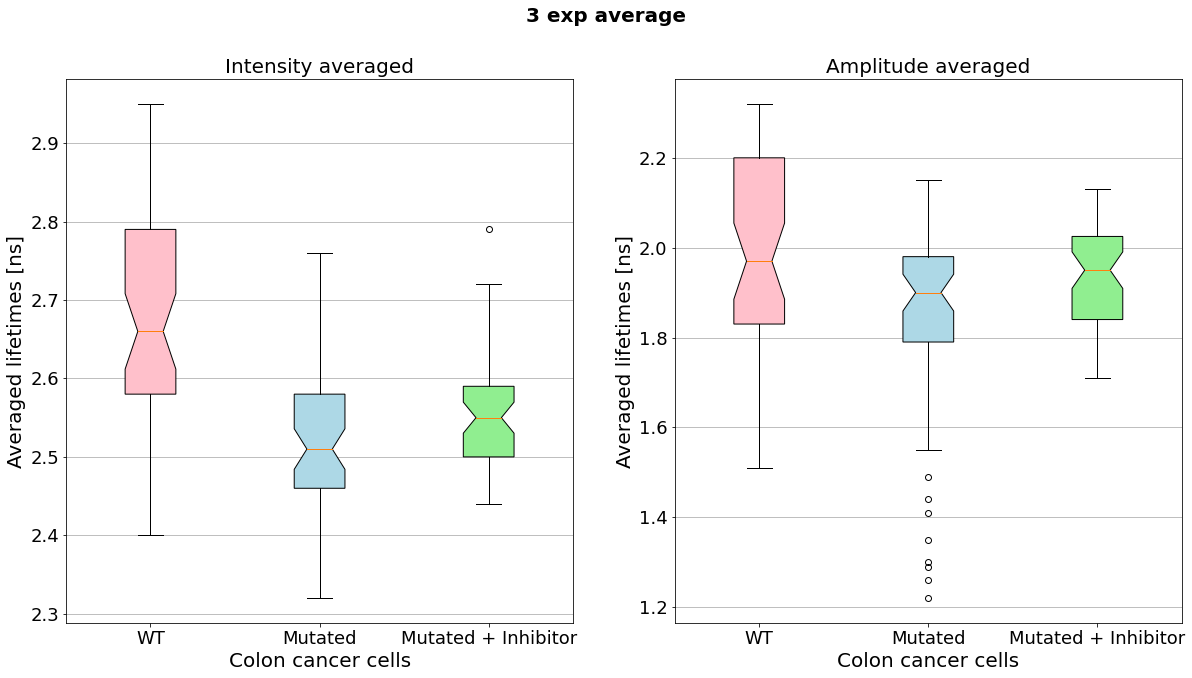

In [11]:
# boxplots for 3 exp averaged lifetimes

Int3_data =((WT_Int3, Mut_Int3, Mut_inh_Int3))
Amp3_data =((WT_Amp3, Mut_Amp3, Mut_inh_Amp3))
labels = ['WT', 'Mutated', 'Mutated + Inhibitor']

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

fig.suptitle('3 exp average', fontsize=20, fontweight='bold')

# Intensity averaged boxplot
bplot1 = ax1.boxplot(Int_data,
                     notch=True,        # notch shape
                     vert=True,         # vertical box alignment
                     patch_artist=True, # fill with color
                    labels=labels)      # will be used to label x-ticks
ax1.set_title('Intensity averaged',fontsize=20)

# Amplitude intensity boxplot
bplot2 = ax2.boxplot(Amp_data,
                     notch=True,  # notch shape
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=labels)  # will be used to label x-ticks
ax2.set_title('Amplitude averaged',fontsize=20)

# fill with colors
colors = ['pink', 'lightblue', 'lightgreen']
for bplot in (bplot1,bplot2):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

# adding horizontal grid lines
for ax in [ax1, ax2]:
    ax.yaxis.grid(True)
    ax.set_xlabel('Colon cancer cells',fontsize=20)
    ax.set_ylabel('Averaged lifetimes [ns]',fontsize=20)
    plt.setp(ax.get_xticklabels(),fontsize = 18)
    plt.setp(ax.get_yticklabels(),fontsize = 18)

 * For amplitude averaged lifetimes there are many outliers and the differences between cells are less pronounced for both 2 and 3 exponential fits.
 * 3 and 2 exponential fit when averaged do not differ much in relative terms, athough in absolute numbers they naturally differs. 

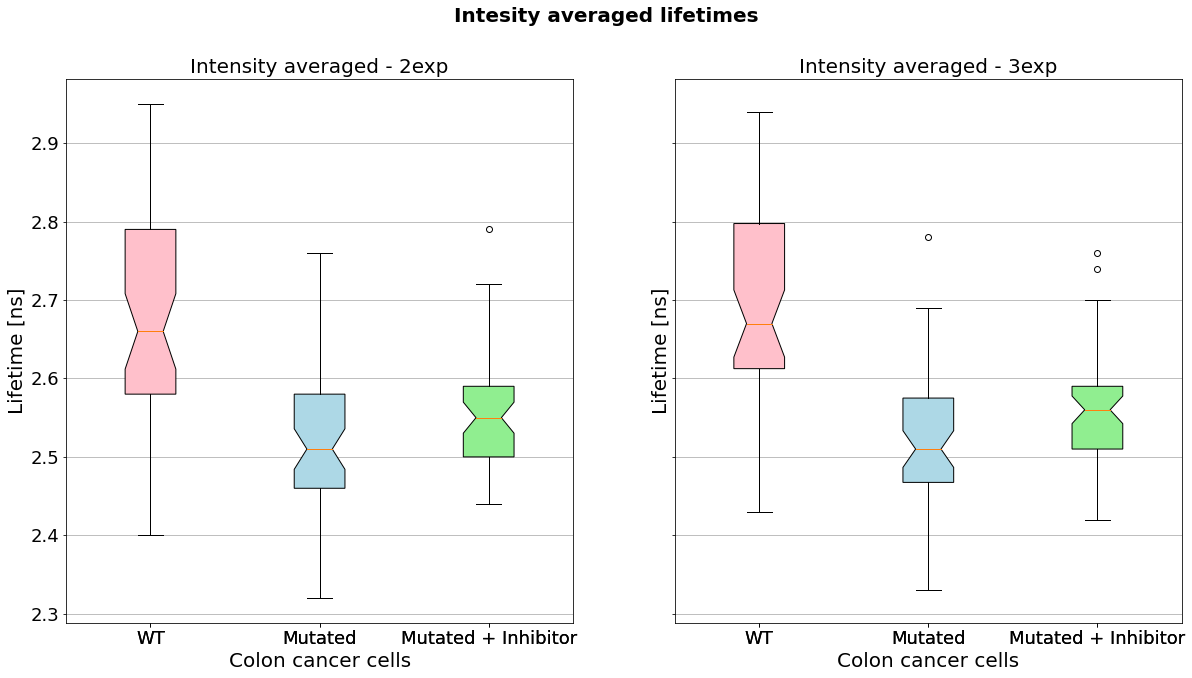

In [12]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=(20, 10))

fig.suptitle('Intesity averaged lifetimes', fontsize=20, fontweight='bold')

# Intensity averaged boxplot
bplot1 = ax1.boxplot(Int_data,
                     notch=True,        # notch shape
                     vert=True,         # vertical box alignment
                     patch_artist=True, # fill with color
                    labels=labels)      # will be used to label x-ticks
ax1.set_title('Intensity averaged - 2exp',fontsize=20)

# Amplitude intensity boxplot
bplot2 = ax2.boxplot(Int3_data,
                     notch=True,  # notch shape
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=labels)  # will be used to label x-ticks
ax2.set_title('Intensity averaged - 3exp',fontsize=20)

# fill with colors
colors = ['pink', 'lightblue', 'lightgreen']
for bplot in (bplot1,bplot2):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

# adding horizontal grid lines
for ax in [ax1, ax2]:
    ax.yaxis.grid(True)
    ax.set_xlabel('Colon cancer cells',fontsize=20)
    ax.set_ylabel('Lifetime [ns]',fontsize=20)
    plt.setp(ax.get_xticklabels(),fontsize = 18)
    plt.setp(ax.get_yticklabels(),fontsize = 18)

# Analysis of the fit parameters: lifetime components

In [13]:
WT_Exp3 = np.concatenate((ccc_WT_3[:,0:2], ccc_WT_3[:,2:4], ccc_WT_3[:,4:6]), axis=0)
Mut_Exp3 = np.concatenate((ccc_mut_3[:,0:2], ccc_mut_3[:,2:4], ccc_mut_3[:,4:6]), axis=0)
MutI_Exp3 = np.concatenate((ccc_mut_I3[:,0:2], ccc_mut_I3[:,2:4], ccc_mut_I3[:,4:6]), axis=0)

WT_Exp2 = np.concatenate((ccc_WT_2[:,0:2], ccc_WT_2[:,2:4]), axis=0)
Mut_Exp2 = np.concatenate((ccc_mut_2[:,0:2], ccc_mut_2[:,2:4]), axis=0)
MutI_Exp2 = np.concatenate((ccc_mut_I2[:,0:2], ccc_mut_I2[:,2:4]), axis=0)

In [14]:
ind = np.argsort(WT_Exp3, axis=0)
WT_Exp3_s = WT_Exp3[ind[:,1]]

ind = np.argsort(WT_Exp2, axis=0)
WT_Exp2_s = WT_Exp2[ind[:,1]]

ind = np.argsort(Mut_Exp3, axis=0)
Mut_Exp3_s = Mut_Exp3[ind[:,1]]

ind = np.argsort(Mut_Exp2, axis=0)
Mut_Exp2_s = Mut_Exp2[ind[:,1]]

ind = np.argsort(MutI_Exp3, axis=0)
MutI_Exp3_s = abs(MutI_Exp3[ind[:,1]])

ind = np.argsort(MutI_Exp2, axis=0)
MutI_Exp2_s = abs(MutI_Exp2[ind[:,1]])

In [15]:
def find_nearest(array, val1, val2):
    array = array[:,1] 
    idx = np.array([0,0])
    idx[0] = (np.abs(array - val1)).argmin()
    idx[1] = (np.abs(array - val2)).argmin()
    return idx

val1 = 0.75
val2 = 2.6

WT3_ind = find_nearest(WT_Exp3_s, val1,val2)
Mut3_ind = find_nearest(Mut_Exp3_s, val1,val2)
MutI3_ind = find_nearest(MutI_Exp3_s, val1,val2)

In [16]:
def find_nearest(array, value):
    array = array[:,1] 
    idx = (np.abs(array - value)).argmin()    
    return idx

value = 2

WT2_ind = find_nearest(WT_Exp2_s, value)
Mut2_ind = find_nearest(Mut_Exp2_s, value)
MutI2_ind = find_nearest(MutI_Exp2_s, value)

# 2 exponential fit

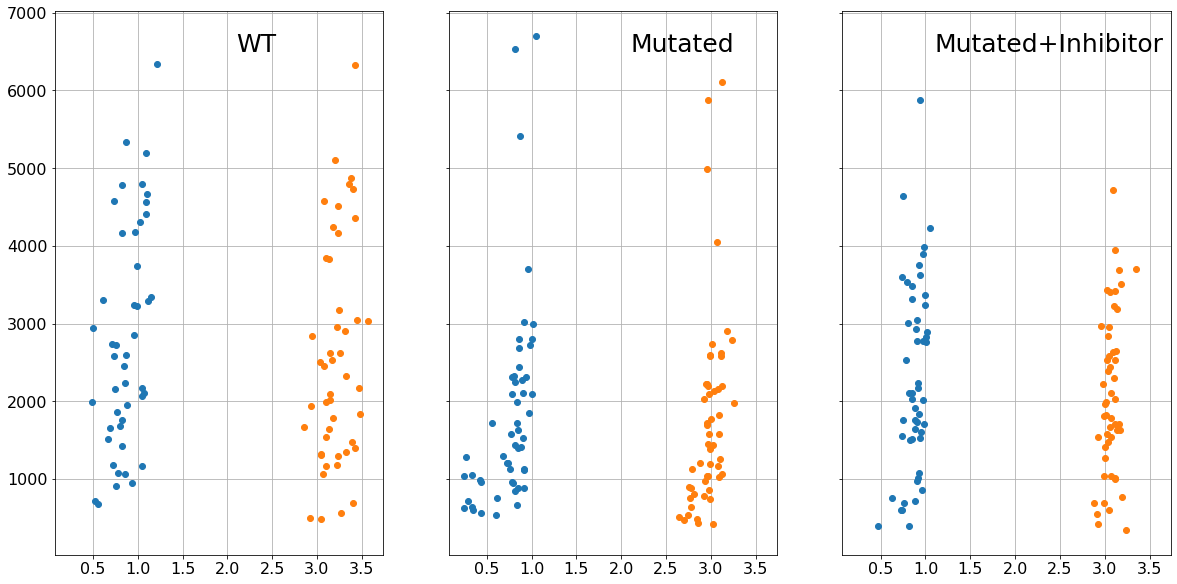

In [17]:
# 2 exp fit: Amplitudes vs. lifetimes

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, figsize=(20, 10))
size = 25
pos = 6500
font_h = 16
font_l = 16

# WT
ax1.plot(WT_Exp2_s[0:WT2_ind,1],WT_Exp2_s[0:WT2_ind,0],'o')
ax1.plot(WT_Exp2_s[(WT2_ind+1):,1],WT_Exp2_s[WT2_ind+1:,0],'o')
ax1.text(2.1, pos, 'WT', size=size)

# Mutated
ax2.plot(Mut_Exp2_s[0:Mut2_ind,1],Mut_Exp2_s[0:Mut2_ind,0],'o')
ax2.plot(Mut_Exp2_s[Mut2_ind:,1],Mut_Exp2_s[Mut2_ind:,0],'o')
ax2.text(2.1, pos, 'Mutated', size=size)

# Mutated + Inhibitor
ax3.plot(MutI_Exp2_s[0:MutI2_ind,1],MutI_Exp2_s[0:MutI2_ind,0],'o')
ax3.plot(MutI_Exp2_s[MutI2_ind:,1],MutI_Exp2_s[MutI2_ind:,0],'o')
ax3.text(1.1, pos, 'Mutated+Inhibitor', size=size)

# adding vertical grid lines
for ax in [ax1, ax2, ax3]:
    ax.xaxis.grid(True)
    ax.yaxis.grid(True)
    plt.setp(ax.get_xticklabels(),fontsize = font_h)
    plt.setp(ax.get_yticklabels(),fontsize = font_l)

# 3 exponential fit

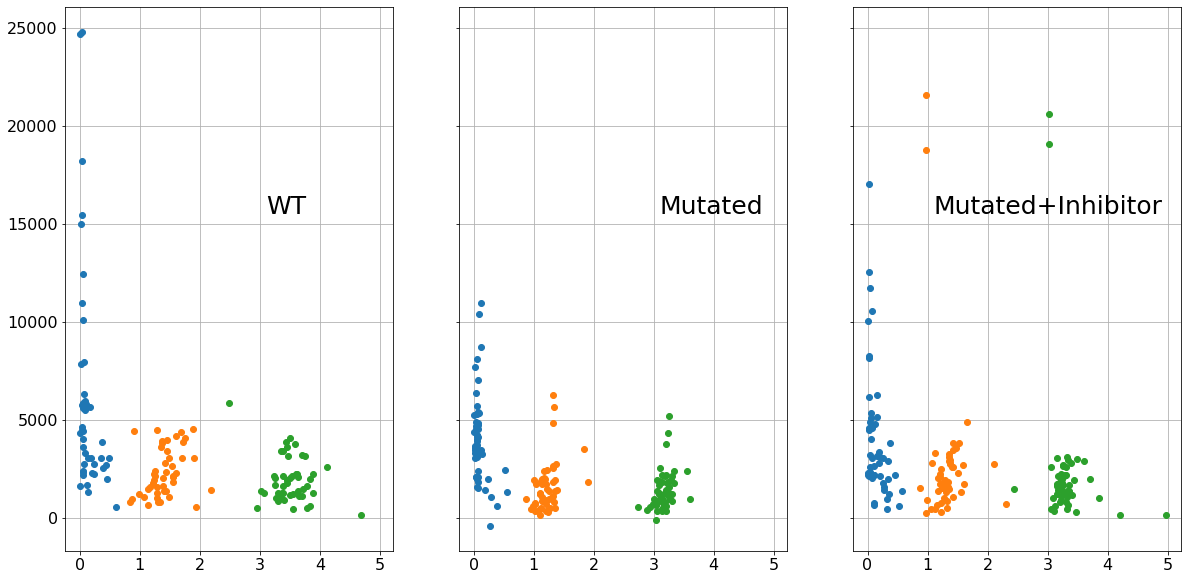

In [18]:
# 3 exp fit: Amplitudes vs. lifetimes

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, figsize=(20, 10))
size = 25
pos = 15500

# WT
ax1.plot(WT_Exp3_s[0:WT3_ind[0],1],WT_Exp3_s[0:WT3_ind[0],0],'o')
ax1.plot(WT_Exp3_s[WT3_ind[0]:WT3_ind[1],1],WT_Exp3_s[WT3_ind[0]:WT3_ind[1],0],'o')
ax1.plot(WT_Exp3_s[WT3_ind[1]:,1],WT_Exp3_s[WT3_ind[1]:,0],'o')
ax1.text(3.1, pos, 'WT', size=size)

# Mutated
ax2.plot(Mut_Exp3_s[0:Mut3_ind[0],1],Mut_Exp3_s[0:Mut3_ind[0],0],'o')
ax2.plot(Mut_Exp3_s[Mut3_ind[0]:Mut3_ind[1],1],Mut_Exp3_s[Mut3_ind[0]:Mut3_ind[1],0],'o')
ax2.plot(Mut_Exp3_s[Mut3_ind[1]:,1],Mut_Exp3_s[Mut3_ind[1]:,0],'o')
ax2.text(3.1, pos, 'Mutated', size=size)

# Mutated + Inhibitor
ax3.plot(MutI_Exp3_s[0:MutI3_ind[0],1],MutI_Exp3_s[0:MutI3_ind[0],0],'o')
ax3.plot(MutI_Exp3_s[MutI3_ind[0]:MutI3_ind[1],1],MutI_Exp3_s[MutI3_ind[0]:MutI3_ind[1],0],'o')
ax3.plot(MutI_Exp3_s[MutI3_ind[1]:,1],MutI_Exp3_s[MutI3_ind[1]:,0],'o')
ax3.text(1.1, pos, 'Mutated+Inhibitor', size=size)

# adding vertical grid lines
for ax in [ax1, ax2, ax3]:
    ax.xaxis.grid(True)
    ax.yaxis.grid(True)
    plt.setp(ax.get_xticklabels(),fontsize = font_h)
    plt.setp(ax.get_yticklabels(),fontsize = font_l)

# Comparison of 2 and 3 exponential fits

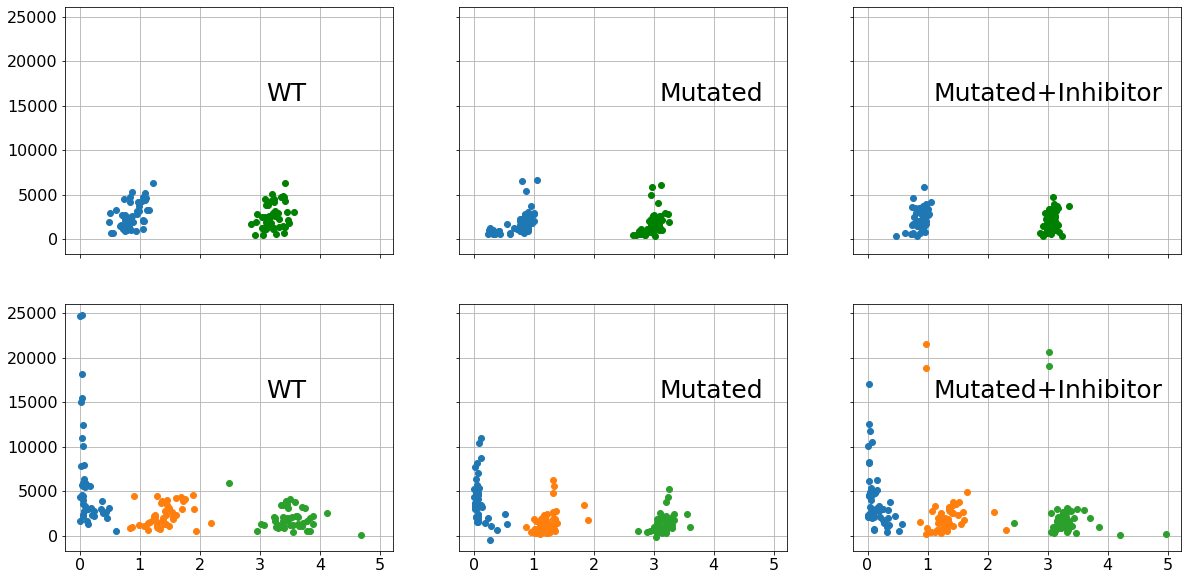

In [19]:
## 2 and 3 exp fits together: Amplitudes vs Lifetimes

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3, sharex=True, sharey=True, figsize=(20, 10))
size = 25
pos = 15500

## 2 exps
# WT 2
ax1.plot(WT_Exp2_s[0:WT2_ind,1],WT_Exp2_s[0:WT2_ind,0],'o')
ax1.plot(WT_Exp2_s[(WT2_ind+1):,1],WT_Exp2_s[WT2_ind+1:,0],'go')
ax1.text(3.1, pos, 'WT', size=size)

# Mutated 2
ax2.plot(Mut_Exp2_s[0:Mut2_ind,1],Mut_Exp2_s[0:Mut2_ind,0],'o')
ax2.plot(Mut_Exp2_s[Mut2_ind:,1],Mut_Exp2_s[Mut2_ind:,0],'go')
ax2.text(3.1, pos, 'Mutated', size=size)

# Mutated + Inhibitor 2
ax3.plot(MutI_Exp2_s[0:MutI2_ind,1],MutI_Exp2_s[0:MutI2_ind,0],'o')
ax3.plot(MutI_Exp2_s[MutI2_ind:,1],MutI_Exp2_s[MutI2_ind:,0],'go')
ax3.text(1.1, pos, 'Mutated+Inhibitor', size=size)

## 3 exps
# WT
ax4.plot(WT_Exp3_s[0:WT3_ind[0],1],WT_Exp3_s[0:WT3_ind[0],0],'o')
ax4.plot(WT_Exp3_s[WT3_ind[0]:WT3_ind[1],1],WT_Exp3_s[WT3_ind[0]:WT3_ind[1],0],'o')
ax4.plot(WT_Exp3_s[WT3_ind[1]:,1],WT_Exp3_s[WT3_ind[1]:,0],'o')
ax4.text(3.1, pos, 'WT', size=size)

# Mutated
ax5.plot(Mut_Exp3_s[0:Mut3_ind[0],1],Mut_Exp3_s[0:Mut3_ind[0],0],'o')
ax5.plot(Mut_Exp3_s[Mut3_ind[0]:Mut3_ind[1],1],Mut_Exp3_s[Mut3_ind[0]:Mut3_ind[1],0],'o')
ax5.plot(Mut_Exp3_s[Mut3_ind[1]:,1],Mut_Exp3_s[Mut3_ind[1]:,0],'o')
ax5.text(3.1, pos, 'Mutated', size=size)

# Mutated + Inhibitor
ax6.plot(MutI_Exp3_s[0:MutI3_ind[0],1],MutI_Exp3_s[0:MutI3_ind[0],0],'o')
ax6.plot(MutI_Exp3_s[MutI3_ind[0]:MutI3_ind[1],1],MutI_Exp3_s[MutI3_ind[0]:MutI3_ind[1],0],'o')
ax6.plot(MutI_Exp3_s[MutI3_ind[1]:,1],MutI_Exp3_s[MutI3_ind[1]:,0],'o')
ax6.text(1.1, pos, 'Mutated+Inhibitor', size=size)

# adding vertical grid lines
for ax in [ax1, ax2, ax3, ax4, ax5, ax6]:
    ax.xaxis.grid(True)
    ax.yaxis.grid(True)
    plt.setp(ax.get_xticklabels(),fontsize = font_h)
    plt.setp(ax.get_yticklabels(),fontsize = font_l)

In [20]:
from scipy.stats import sem 

TauD_2 = np.mean(WT_Exp2_s[(WT2_ind+1):,1])
TauD_2_std = sem(WT_Exp2_s[(WT2_ind+1):,1])
TauD_2_rel = TauD_2_std/TauD_2

TauDA_2 = np.mean(Mut_Exp2_s[Mut2_ind:,1])
TauDA_2_std = sem(Mut_Exp2_s[Mut2_ind:,1])
TauDA_2_rel = TauDA_2_std/TauDA_2

TauDA_2I = np.mean(MutI_Exp2_s[MutI2_ind:,1])
TauDA_2I_std = sem(MutI_Exp2_s[MutI2_ind:,1])
TauDA_2I_rel = TauDA_2I_std/TauDA_2I

Tab_2 = np.round(([TauD_2,TauD_2_std],[TauDA_2,TauDA_2_std],[TauDA_2I,TauDA_2I_std]),2)
Rel_err2 = [(TauD_2_rel+TauDA_2_rel),(TauD_2_rel+TauDA_2I_rel)]

TauD_3 = np.mean(WT_Exp3_s[WT3_ind[1]:,1])
TauD_3_std = sem(WT_Exp3_s[WT3_ind[1]:,1])
TauD_3_rel = TauD_3_std/TauD_3

TauDA_3 = np.mean(Mut_Exp3_s[Mut3_ind[1]:,1])
TauDA_3_std = sem(Mut_Exp3_s[Mut3_ind[1]:,1])
TauDA_3_rel = TauDA_3_std/TauDA_3

TauDA_3I = np.mean(MutI_Exp3_s[MutI3_ind[1]:,1])
TauDA_3I_std = sem(MutI_Exp3_s[MutI3_ind[1]:,1])
TauDA_3I_rel = TauDA_3I_std/TauDA_3I

Tab_3 = np.round(([TauD_3,TauD_3_std],[TauDA_3,TauDA_3_std],[TauDA_3I,TauDA_3I_std]),2)
Rel_err3 = [(TauD_3_rel+TauDA_3_rel),(TauD_3_rel+TauDA_3I_rel)]

# Calculating FRET efficiency

* From above analysis is clearly visible the longest lifetimes is changing in mutated cells compared to WT
* Inhibitor acts as expected: inhibits partly CDK1 biosensor
* FRET efficiency is calculated:
$$ E = 1 - \frac{\tau_{DA}}{\tau_D}$$
where $\tau_{DA}$ and $\tau_D$ is lifetime of the CFP with YFP and CFP without YFP in close proximity, respectively

In [21]:
print('Averaged longer lifetimes from 2 exponential fits')

# importing the modules
from IPython.display import display
import pandas as pd

# creating a DataFrame
dict = {'Avg Lifetime' : Tab_2[:,0],
        'Std. Dev.' : Tab_2[:,1]}
df2 = pd.DataFrame(dict,['WT', 'Mutated', 'Mutated + inhib'])

# displaying the DataFrame
display(df2)

print('Averaged longest lifetimes from 3 exponential fits')

dict = {'Avg Lifetime' : Tab_3[:,0],
        'Std. Dev.' : Tab_3[:,1]}
df3 = pd.DataFrame(dict,['WT', 'Mutated', 'Mutated + inhib'])

display(df3)

Averaged longer lifetimes from 2 exponential fits


,Avg Lifetime,Std. Dev.
WT,3.21,0.02
Mutated,2.97,0.02
Mutated + inhib,3.07,0.01


Averaged longest lifetimes from 3 exponential fits


,Avg Lifetime,Std. Dev.
WT,3.51,0.05
Mutated,3.16,0.02
Mutated + inhib,3.31,0.05


In this case **WT** lifetime is taken as $\tau_D$ and lifetimes of CFP in **mutated and mutated cell treated with inhibitor** as $\tau_{DA}$

|Cells|Avg Lifetime [ns]|Std. Dev. [ns]|
|-:|:-:|:-:|   
| **WT**|3.51|0.05 
|**Mutated**|3.16|0.02
|**Mutated + inhibitor**|3.31|0.05

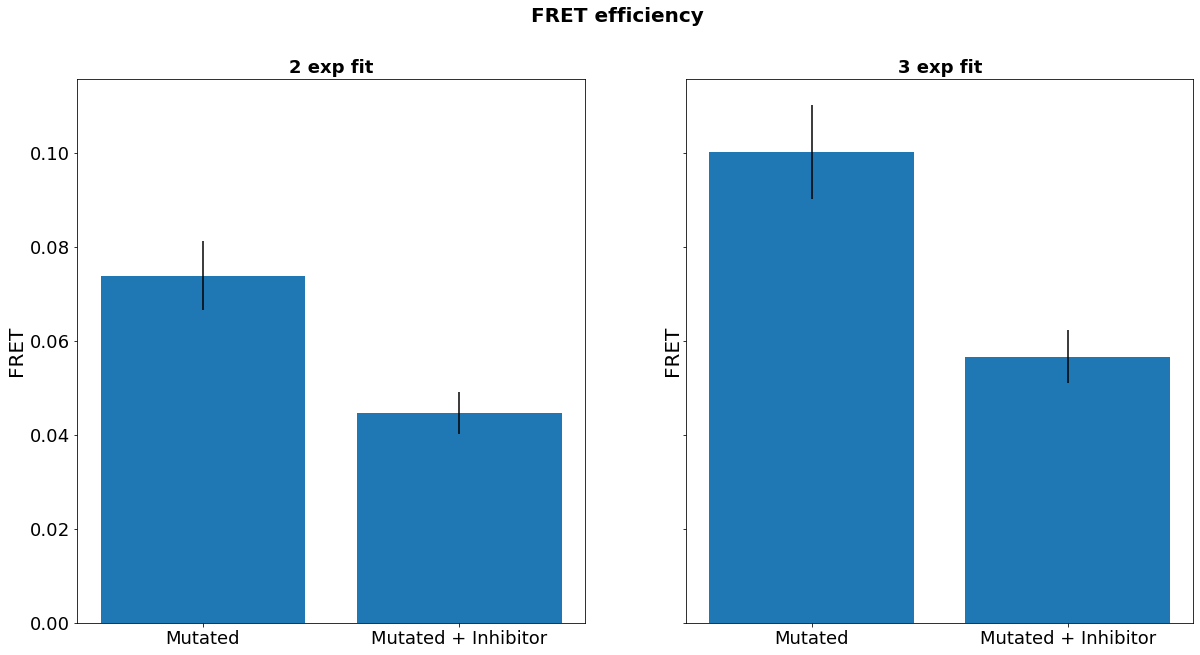

In [22]:
# FRET bar plot

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=(20, 10))

fig.suptitle('FRET efficiency', fontsize=20, fontweight='bold')

font_x = 18
font_y = 18

E2_M = 1-TauDA_2/TauD_2
E2_MI = 1-TauDA_2I/TauD_2

E3_M = 1-TauDA_3/TauD_3
E3_MI = 1-TauDA_3I/TauD_3

# 2 Exp longer component average
ax1.bar(['Mutated','Mutated + Inhibitor'], [E2_M,E2_MI], yerr = [(0.1*E2_M),(0.1*E2_MI)])
ax1.set_title('2 exp fit',fontsize=18,fontweight='bold')

ax2.bar(['Mutated','Mutated + Inhibitor'], [E3_M,E3_MI],yerr = [(0.1*E3_M),(0.1*E3_MI)])
ax2.set_title('3 exp fit',fontsize=18,fontweight='bold')

for ax in [ax1, ax2, ax3]:
    #ax.set_xlabel('')
    ax.set_ylabel('FRET',fontsize=20)
    plt.setp(ax.get_xticklabels(),fontsize = font_x)
    plt.setp(ax.get_yticklabels(),fontsize = font_y)